# Session 06 

## Time series & Natural Language Processing  <table class="tfo-notebook-buttons" align="right" style="margin-top:-55px">
  <td>
      <a target="_blank" href="https://keras.io/search.html?query=recurrent%20neural%20network"><CNTER><img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fadventuresinmachinelearning.com%2Fwp-content%2Fuploads%2F2017%2F05%2Fkeras-logo-small-wb-1.png&f=1&nofb=1"  width="50" height="50" /><p style='margin-left:12px'>KERAS</p></CENTER></a>
  </td>
 </table>

In [50]:
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow.python.keras.layers.core import Activation

skip_plot =5  ### Plot strides


In [52]:
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'

openpower_germany_df = pd.read_csv(url, sep=',', index_col=0, 
                             parse_dates=[0]) 
openpower_germany_df.tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


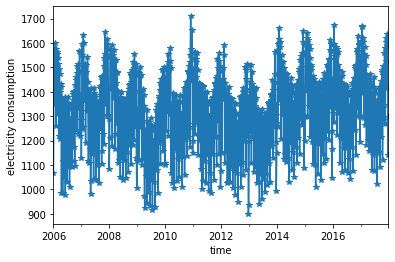

(4383,)


In [2]:
openpower_germany_df['Consumption'][::skip_plot].plot(marker='*')
plt.xlabel('time')
plt.ylabel('electricity consumption')
plt.show()
consumption_energy = openpower_germany_df['Consumption'].to_numpy()
print(consumption_energy.shape)

In [3]:
### process the data for training and testing
def make_data(time_series,step_x,step_y):
    x = list()
    Y = list()
    for i in range(len(time_series)):
        ind_x = i + step_x
        ind_y = ind_x + step_y
        if (ind_y>len(time_series)):  #as step_y can be big and bounding condition
            break

        seq_x, seq_y = time_series[i:ind_x], time_series[ind_x:ind_y]
        x.append(seq_x)
        Y.append(seq_y)
    return x,Y

step_x = 25
step_y = 1

x,Y = make_data(consumption_energy,step_x,step_y)
x = np.array(x)
Y = np.array(Y)
feature_in = 1
x = x.reshape(x.shape[0],x.shape[1],feature_in)
print((x.shape,Y.shape))

((4358, 25, 1), (4358, 1))


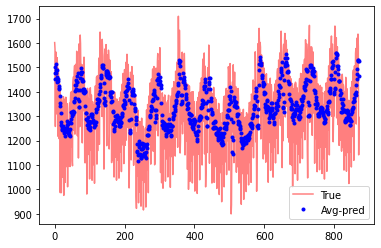

16.910015671505295

In [4]:
### now we can apply different algorithms
#Average
def avg_baseline(x):
    return np.mean(x,axis=1)

Y_pred_avg = avg_baseline(x)


plt.plot(Y[::skip_plot],alpha=0.5,color='r')
plt.plot(Y_pred_avg[::skip_plot],'b.')
plt.legend(['True','Avg-pred'])
plt.show()
r2_score(Y, Y_pred_avg)*100.

## Simple RNN

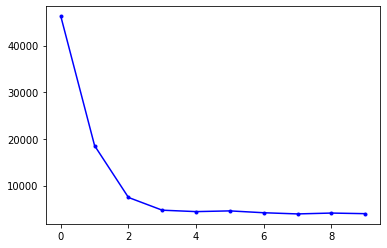

In [5]:
from tensorflow import keras
import numpy as np
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(100,activation='relu',input_shape=(step_x,feature_in)),
    keras.layers.Dense(step_y)
])

optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)
history= model.fit(x,Y,epochs=10,verbose=0)
loss = history.history["loss"] 
plt.plot(loss, "b.-", label='Trainig Loss')
plt.show()

In [6]:
y_pred = model.predict(x)
print(f'Actual: {Y[0]} Prediction: {y_pred[0]}')

Actual: [1601.673] Prediction: [1591.3057]


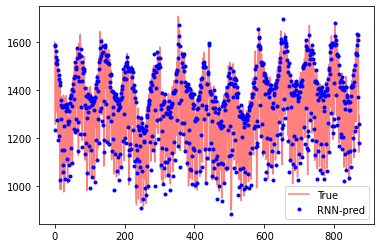

86.99619306691943

In [16]:
### calculate the accuracy
y_all_pred  = y_pred #model.evaluate(x)
plt.plot(Y[::skip_plot],alpha=0.5,color='r')
plt.plot(y_all_pred[::skip_plot],'b.')
plt.legend(['True','RNN-pred'])
plt.show()
r2_score(Y, y_all_pred)*100.

## GRU

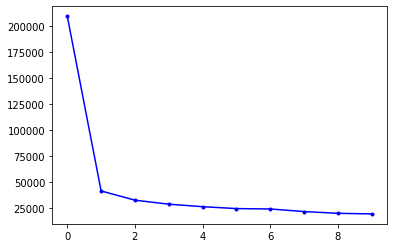

In [36]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.GRU(100,activation='relu',input_shape=(step_x,feature_in),return_sequences=True),
    keras.layers.GRU(100,activation='relu',return_sequences=True),
    keras.layers.Dense(step_y)
])

model.compile(loss="mse", optimizer="adam", metrics=['mean_squared_error'])
history= model.fit(x,Y,epochs=10,verbose=0)
loss = history.history["loss"] 
plt.plot(loss, "b.-", label='Trainig Loss')
plt.show()


In [37]:
y_pred = model.predict(x)
print(f'Actual: {Y[0]} Prediction: {y_pred[0][-1]}')

Actual: [1601.673] Prediction: [1562.7634]


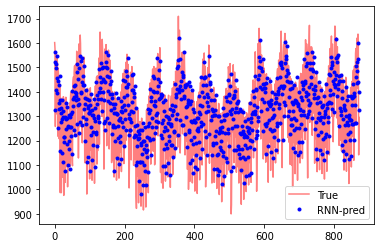

62.36829534517957

In [38]:
### calculate the accuracy
y_all_pred  = y_pred[:,-1,0] #model.evaluate(x)
plt.plot(Y[::skip_plot],alpha=0.5,color='r')
plt.plot(y_all_pred[::skip_plot],'b.')
plt.legend(['True','RNN-pred'])
plt.show()
r2_score(Y, y_all_pred)*100.

## LSTM

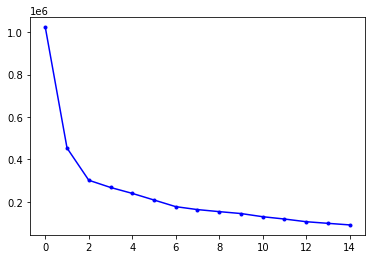

In [39]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.LSTM(400,activation='relu',input_shape=(step_x,feature_in),return_sequences=True),
    keras.layers.LSTM(200,activation='relu',return_sequences=True),
    keras.layers.Dense(step_y)
])

model.compile(loss="mse", optimizer="adam", metrics=['mean_squared_error'])
history= model.fit(x,Y,epochs=15,verbose=0)
loss = history.history["loss"] 
plt.plot(loss, "b.-", label='Trainig Loss')
plt.show()

In [40]:
y_pred = model.predict(x)
print(f'Actual: {Y[0]} Prediction: {y_pred[0][-1]}')

Actual: [1601.673] Prediction: [1363.0426]


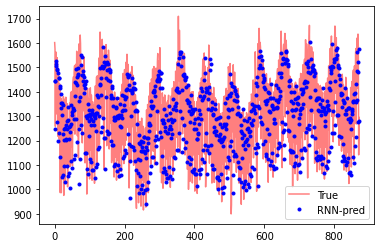

42.65342291890614

In [49]:
### calculate the accuracy
y_all_pred  = y_pred[:,-10,0] #model.evaluate(x)
plt.plot(Y[::skip_plot],alpha=0.5,color='r')
plt.plot(y_all_pred[::skip_plot],'b.')
plt.legend(['True','RNN-pred'])
plt.show()
r2_score(Y, y_all_pred)*100.